In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fabrizziosilva","key":"e3ea91e3b136ea5b3e6ea6ea563fc3ce"}'}

In [ ]:
# Crear carpeta de Kaggle y mover el archivo
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Instalar kaggle si no está instalado
!pip install -q kaggle

# Descargar el dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Descomprimir
!unzip -q chest-xray-pneumonia.zip


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:23<00:00, 130MB/s]
100% 2.29G/2.29G [00:23<00:00, 106MB/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'chest_xray/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'chest_xray/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')  # salida binaria
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 273ms/step - accuracy: 0.8201 - loss: 0.4547 - val_accuracy: 0.6875 - val_loss: 0.7007
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 263ms/step - accuracy: 0.9557 - loss: 0.1138 - val_accuracy: 0.8125 - val_loss: 0.3600
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 288ms/step - accuracy: 0.9732 - loss: 0.0760 - val_accuracy: 0.6875 - val_loss: 0.9860
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 266ms/step - accuracy: 0.9703 - loss: 0.0876 - val_accuracy: 0.7500 - val_loss: 0.4558
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 264ms/step - accuracy: 0.9870 - loss: 0.0422 - val_accuracy: 0.8125 - val_loss: 0.2971
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 263ms/step - accuracy: 0.9892 - loss: 0.0337 - val_accuracy: 1.0000 - val_loss: 0.0415
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 42s 258ms/step - accuracy: 0.9800 - loss: 0.0535 - val_accuracy: 1.0000 - val_loss: 0.0475
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 262ms/step - accuracy: 0.9929 - loss: 0

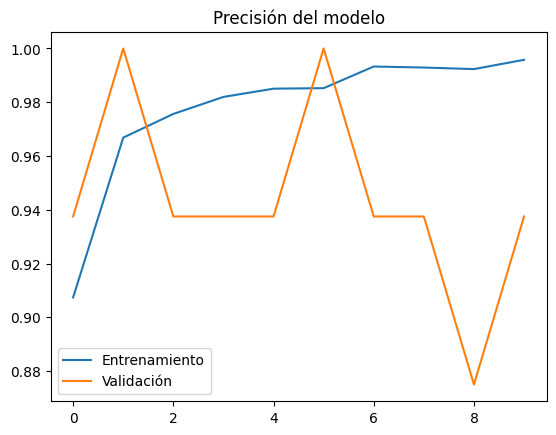

In [ ]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.legend()
plt.title('Precisión del modelo')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving chest-xray.jpg to chest-xray.jpg


In [ ]:
model.save("modelo_entrenado.keras")
files.download("modelo_entrenado.keras")

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'chest-xray.jpg'

# Cargar la imagen con el mismo tamaño que usaste en el modelo
img = image.load_img(img_path, target_size=(150, 150))

# Convertir a array numpy y escalar
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # normalizar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
✅ Resultado: Neumonía (probabilidad: 99.99%)


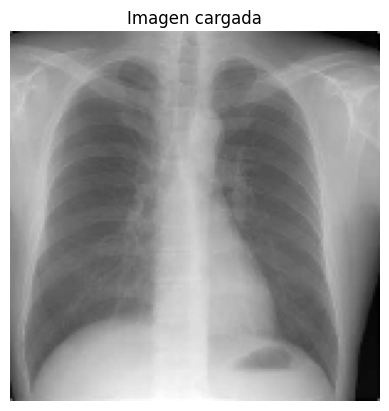

In [ ]:
# Hacer la predicción
prediction = model.predict(img_array)

# Interpretar resultado
if prediction[0][0] > 0.5:
    print("✅ Resultado: Neumonía (probabilidad: {:.2f}%)".format(prediction[0][0] * 100))
else:
    print("✅ Resultado: Normal (probabilidad: {:.2f}%)".format((1 - prediction[0][0]) * 100))

import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.title("Imagen cargada")
plt.show()